In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

filepath = 'D:\\user\\Downloads\\audio-classification-master\\audio-classification-master\\'
# Set Parameters 
class_count = 4

#load data
X = np.load(filepath+'feat1.npy')
y = np.load(filepath+'label1.npy').ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=233)

In [4]:
print(X_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[[-7.07260103e+01  1.27898805e+02 -2.70113388e+01 ... -1.40260744e-03
  -5.15055520e-04 -2.78041299e-03]
 [-3.90626370e+02  1.69965418e+02  5.99807873e+01 ...  2.26014636e-02
   6.73064329e-03  1.91348086e-02]
 [-2.29567607e+02  1.92607241e+02 -3.68560736e+01 ... -1.84190349e-01
   9.15980842e-03  3.28283854e-02]
 ...
 [-1.98314453e+02  9.99620420e+01 -3.98361609e+01 ...  5.28596828e-02
   1.92141477e-02  1.47879642e-02]
 [-3.29633657e+02  1.64028334e+02  8.94119518e+00 ...  2.33184931e-01
   1.28791737e-02  2.50692981e-02]
 [-4.26755731e+02  2.17659644e+02  2.07491995e+01 ...  4.10540740e-02
   4.10276732e-03 -3.51616790e-03]]
(420, 193)
(420,)
(180, 193)
(180,)


In [5]:
# Convert label to onehot
y_train = tf.keras.utils.to_categorical(y_train - 1, num_classes=class_count)
y_test = tf.keras.utils.to_categorical(y_test - 1, num_classes=class_count)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(420, 193, 1)
(420, 4)
(180, 193, 1)
(180, 4)


In [9]:
# Build the Neural Network
from keras import regularizers
from  tensorflow.python.keras.layers import BatchNormalization

model = models.Sequential()
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(193,1)))
model.add(layers.MaxPooling1D(3))

model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.GlobalAveragePooling1D())


model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(class_count, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 191, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 63, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 61, 128)           24704     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
____________________

In [11]:
#Train model
history = model.fit(X_train, y_train,batch_size=8, epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
420/420 [==============================] - 1s 3ms/step - loss: 1.4878 - acc: 0.3262
Epoch 2/100
420/420 [==============================] - 0s 785us/step - loss: 1.3365 - acc: 0.4238
Epoch 3/100
420/420 [==============================] - 0s 732us/step - loss: 1.2292 - acc: 0.4786
Epoch 4/100
420/420 [==============================] - 0s 745us/step - loss: 1.1925 - acc: 0.4571
Epoch 5/100
420/420 [==============================] - 0s 718us/step - loss: 1.1931 - acc: 0.4714
Epoch 6/100
420/420 [==============================] - 0s 968us/step - loss: 1.1596 - acc: 0.5310
Epoch 7/100
420/420 [==============================] - 0s 905us/step - loss: 1.1144 - acc: 0.5262
Epoch 8/100
420/420 [==============================] - 0s 743us/step - loss: 1.1070 - acc: 0.5643
Epoch 9/100
420/420 [==============================] - 0s 788us/step - loss: 1.0899 - acc: 0.5833
Epoch 10/100
420/420 [====

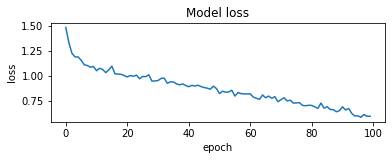

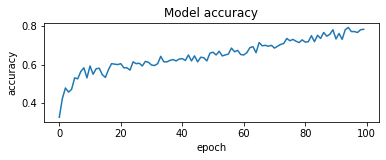

In [12]:
#plot history 
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.subplot(2, 1, 2)
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
ypredict = model.predict(X_test)
ytest=np.argmax(y_test, axis=1)
ypredict=np.argmax(ypredict, axis=1)
print(ypredict.shape)
print(ytest.shape)
conf = confusion_matrix(ytest, ypredict)
print(conf)

(180,)
(180,)
[[36  5  2  8]
 [16 17  2  7]
 [ 5  4 23 10]
 [ 7  4 15 19]]


In [14]:
#evaluate model(testset)
loss, acc = model.evaluate(X_test, y_test, verbose=30)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 1.171067522631751
Test accuracy: 0.5277777764532301
